In [5]:
from astropy.io import fits

In [6]:
import matplotlib.pyplot as plt

In [11]:
hdulist = fits.open('data/gll_iem_v02_P6_V11_DIFFUSE.fit')

FileNotFoundError: [Errno 2] No such file or directory: 'data/gll_iem_v02_P6_V11_DIFFUSE.fit'

In [12]:
hdulist

NameError: name 'hdulist' is not defined

In [9]:
print(len(hdulist))
hdu1 = hdulist[0]
hdu1.header

NameError: name 'hdulist' is not defined

In [10]:
answerlist = [hdu1.header[5], hdu1.header[-11], hdu1.header[-10], hdu1.header[-5], hdu1.header[-2]]
print(answerlist)

NameError: name 'hdu1' is not defined

In [25]:
hdu1.data

array([[[1.20141934e-07, 1.19992990e-07, 1.19992990e-07, ...,
         1.17146094e-07, 1.17146094e-07, 1.17242180e-07],
        [1.26873346e-07, 1.26873346e-07, 1.26829207e-07, ...,
         1.24251599e-07, 1.24325553e-07, 1.24325553e-07],
        [1.31679627e-07, 1.31590227e-07, 1.31542834e-07, ...,
         1.34925770e-07, 1.34955656e-07, 1.35187406e-07],
        ...,
        [1.14278869e-07, 1.14215226e-07, 1.14194677e-07, ...,
         1.09027361e-07, 1.09093030e-07, 1.09137709e-07],
        [1.12280688e-07, 1.12280688e-07, 1.12276986e-07, ...,
         1.09685772e-07, 1.09658203e-07, 1.09658203e-07],
        [1.09558805e-07, 1.09467798e-07, 1.09467798e-07, ...,
         1.09205502e-07, 1.09205502e-07, 1.09279974e-07]],

       [[7.89390882e-08, 7.88358321e-08, 7.88358321e-08, ...,
         7.67633708e-08, 7.67633708e-08, 7.68264741e-08],
        [8.37779766e-08, 8.37779766e-08, 8.37445597e-08, ...,
         8.17242594e-08, 8.17777632e-08, 8.17777632e-08],
        [8.73966570e-08, 

In [28]:
print(hdu1.data.shape)

(30, 360, 720)


In [31]:
import numpy as np

In [32]:
np.max(hdu1.data[0])

4.5921523e-05

In [33]:
np.min(hdu1.data[0])

7.027717e-08

In [34]:
np.std(hdu1.data[0])

1.3843595e-06

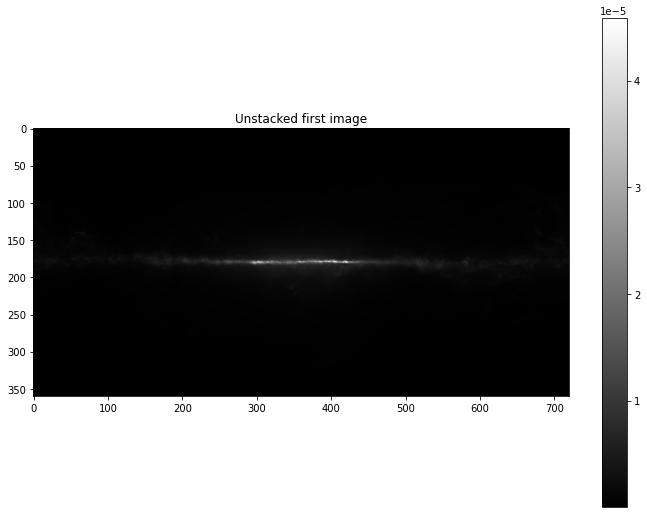

In [99]:
plt.imshow(hdu1.data[0], cmap='gray', vmin = 7.027717e-08, vmax = 4.5921523e-05)
plt.colorbar()
plt.title("Unstacked first image")
plt.rcParams['figure.figsize'] = [12, 9]

In [92]:
hdustack = 0
for i in range(4, 30, 5):
    hdustack = hdustack + hdu1.data[i]

In [93]:
np.min(hdustack.data)

1.2774165e-08

In [94]:
np.max(hdustack.data)

1.0907543e-05

In [95]:
np.std(hdustack.data)

3.5807247e-07

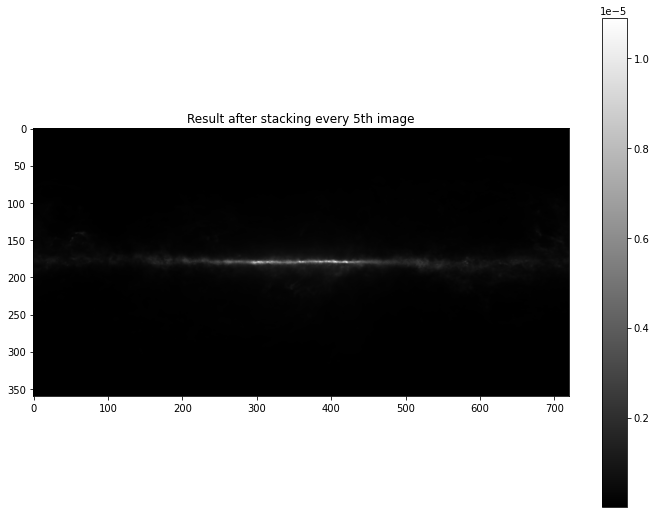

In [100]:
plt.imshow(hdustack.data, cmap='gray', vmin = 1.2774165e-08, vmax = 1.0907543e-05)
plt.colorbar()
plt.title("Result after stacking every 5th image")
plt.rcParams['figure.figsize'] = [12, 9]

In [61]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

In [71]:
def Altitude(coord, time: Time):
    iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    time2 = time + 6.5*u.hour
    coords_h = coord.transform_to(AltAz(obstime=time2, location=iitm))
    return coords_h.alt

In [74]:
print(Altitude(SkyCoord(12.11*u.deg, 85.26*u.deg), Time('2021-7-11 22:00:00')))

14d53m09.859s
